# Prophet-Compatible Preprocessing

In [1]:
import pandas as pd

# Load dataset
df_prophet = pd.read_csv("complete_dataset.csv")

# Convert 'date' to datetime
df_prophet['date'] = pd.to_datetime(df_prophet['date'])

# Fill missing values
df_prophet['solar_exposure'].fillna(df_prophet['solar_exposure'].median(), inplace=True)
df_prophet['rainfall'].fillna(df_prophet['rainfall'].median(), inplace=True)

# Rename columns for Prophet
df_prophet.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)

# Select relevant columns for Prophet
prophet_cols = ['ds', 'y', 'school_day', 'holiday', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
df_prophet = df_prophet[prophet_cols]

# Encode categorical variables (Prophet supports regressors)
df_prophet['school_day'] = df_prophet['school_day'].map({'N': 0, 'Y': 1})
df_prophet['holiday'] = df_prophet['holiday'].map({'N': 0, 'Y': 1})

# Display final dataset
df_prophet.head()


C:\Users\S.Bharath\AppData\Local\Temp\ipykernel_29420\1368528665.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prophet['solar_exposure'].fillna(df_prophet['solar_exposure'].median(), inplace=True)
C:\Users\S.Bharath\AppData\Local\Temp\ipykernel_29420\1368528665.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

,ds,y,school_day,holiday,min_temperature,max_temperature,solar_exposure,rainfall
0,2015-01-01,99635.030,0,1,13.3,26.9,23.6,0.0
1,2015-01-02,129606.010,0,0,15.4,38.8,26.8,0.0
2,2015-01-03,142300.540,0,0,20.0,38.2,26.5,0.0
3,2015-01-04,104330.715,0,0,16.3,21.4,25.2,4.2
4,2015-01-05,118132.200,0,0,15.0,22.0,30.7,0.0


In [2]:
# prompt: Using dataframe df_prophet: suggest a plot

import altair as alt

# Create a line chart of 'y' over time ('ds')
alt.Chart(df_prophet).mark_line().encode(
    x='ds:T',  # Encode 'ds' as a time unit
    y='y'  # Encode 'y' as the vertical axis
).properties(
    title='Time Series of y' # Add a title to the chart
)


ModuleNotFoundError: No module named 'altair'

# Machine Learning Preprocessing (Without Prophet)

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df_ml = pd.read_csv("complete_dataset.csv")

# Convert 'date' to datetime and set as index
df_ml['date'] = pd.to_datetime(df_ml['date'])
df_ml.set_index('date', inplace=True)

# Fill missing values with median
df_ml['solar_exposure'].fillna(df_ml['solar_exposure'].median(), inplace=True)
df_ml['rainfall'].fillna(df_ml['rainfall'].median(), inplace=True)

# Encode categorical variables as binary (0/1)
df_ml['school_day'] = df_ml['school_day'].map({'N': 0, 'Y': 1})
df_ml['holiday'] = df_ml['holiday'].map({'N': 0, 'Y': 1})

# Normalize numerical features using MinMaxScaler
numerical_cols = ['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
                  'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP',
                  'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
scaler = MinMaxScaler()
df_ml[numerical_cols] = scaler.fit_transform(df_ml[numerical_cols])

# Feature Engineering: Lag features
df_ml['RRP_lag1'] = df_ml['RRP'].shift(1)
df_ml['RRP_lag7'] = df_ml['RRP'].shift(7)

# Drop NaN values generated from shifting
df_ml.dropna(inplace=True)

# Display final dataset
df_ml.head()


ModuleNotFoundError: No module named 'sklearn'

In [5]:
# prompt: Using dataframe df_ml: suggest a plot

import altair as alt

# Reset the index to make 'date' a regular column
df_ml = df_ml.reset_index()

# Create a scatter plot of demand vs. RRP, colored by school_day
alt.Chart(df_ml).mark_circle().encode(
    x='RRP',
    y='demand',
    color='school_day:N',  # Nominal color encoding for school_day
    tooltip=['date', 'demand', 'RRP', 'school_day']
).interactive()

alt.Chart(...)

In [9]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer

# ... (Load your data as before) ...
df = pd.read_csv("/content/complete_dataset.csv")

# 1. Handling Missing Values (KNN Imputation)
# Convert 'date' to datetime and then to numeric representation
df['date'] = pd.to_datetime(df['date']).astype(int) / 10**9  # Convert to Unix timestamp

# Select only numerical features for imputation
numerical_features_for_imputation = ['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
                                      'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP',
                                      'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
# Create a subset of the DataFrame with only numerical features
df_numerical = df[numerical_features_for_imputation]

imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df_numerical)  # Impute on numerical features only

# Update the original DataFrame with imputed values
df[numerical_features_for_imputation] = df_filled

# Convert the numeric representation of 'date' back to datetime
df['date'] = pd.to_datetime(df['date'], unit='s')

# 2. Feature Scaling (Standardization)
numerical_features = ['min_temperature', 'max_temperature', 'solar_exposure', 'RRP']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. Handling Outliers (Example using IQR)
# (This part requires careful consideration based on your data)
# For demonstration, let's consider 'demand' column:
Q1 = df['demand'].quantile(0.25)
Q3 = df['demand'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['demand'] = np.clip(df['demand'], lower_bound, upper_bound)  # Clip outliers

# 4. Feature Engineering (Example: Lagged Feature)
df['demand_lag1'] = df['demand'].shift(1)  # Demand from previous day
df = df.dropna()  # Drop the first row (due to shift)

# ... (Rest of your code: One-Hot Encoding, Prophet modeling, etc.) ...

In [10]:
ohe_Encoder=OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')
categorical_col=['school_day','holiday']
encoded_df=ohe_Encoder.fit_transform(df[categorical_col])
df=pd.concat([df,encoded_df],axis=1).drop(columns=categorical_col)

In [11]:
# df

In [12]:
# Rename columns for Prophet
df = df.rename(columns={"date": "ds", "demand": "y"})
df = df[["ds", "y", "min_temperature", "max_temperature", "solar_exposure", "RRP", "school_day_Y"]]

In [13]:
model = Prophet()
model.add_country_holidays(country_name='AU')
model.add_regressor('min_temperature')
model.add_regressor('max_temperature')
model.add_regressor('solar_exposure')
model.add_regressor('RRP')
model.add_regressor('school_day_Y')

In [14]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx54_1orh/66wcoc3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx54_1orh/ssbrjt8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66086', 'data', 'file=/tmp/tmpx54_1orh/66wcoc3g.json', 'init=/tmp/tmpx54_1orh/ssbrjt8n.json', 'output', 'file=/tmp/tmpx54_1orh/prophet_modelsfelb37g/prophet_model-20250307113446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:34:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
future=model.make_future_dataframe(periods=30)
future["min_temperature"] = df["min_temperature"].iloc[-1]
future["max_temperature"] = df["max_temperature"].iloc[-1]
future["solar_exposure"] = df["solar_exposure"].iloc[-1]
future["RRP"] = df["RRP"].iloc[-1]
future["school_day_Y"] = df["school_day_Y"].iloc[-1]

In [16]:
forecast=model.predict(future)

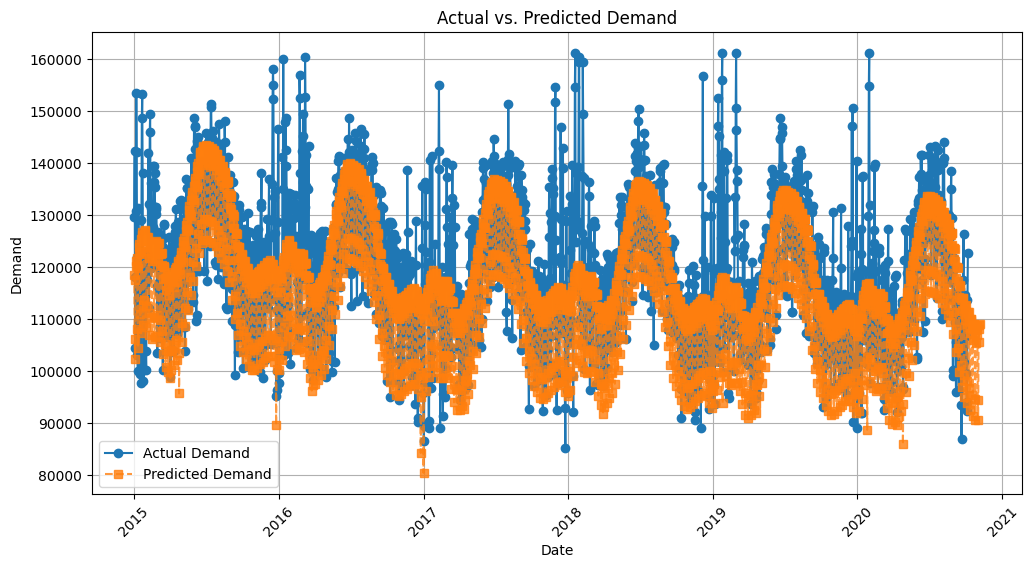

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="Actual Demand", marker='o', linestyle="-")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Demand", marker='s', linestyle="--", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Actual vs. Predicted Demand")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()